In [12]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 30pt;}
div.output { font-size: 20pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 30pt;}
div.prompt { min-width: 100px;}
</style>
"""))

C:\Users\HKEDU\AppData\Local\Temp\ipykernel_9576\1014303460.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense 

import numpy as np

Data_set = np.loadtxt("https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/ThoraricSurgery3.csv"
                      ,delimiter=',')

In [6]:
X = Data_set[:, 0:16]
y = Data_set[:,16]

In [11]:
model = Sequential()     
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'] )
history = model.fit(X,y,epochs=5,batch_size=16)

Epoch 1/5
30/30 [==============================] - 0s 759us/step - loss: 1.5856 - accuracy: 0.8043
Epoch 2/5
30/30 [==============================] - 0s 793us/step - loss: 0.9048 - accuracy: 0.8043
Epoch 3/5
30/30 [==============================] - 0s 724us/step - loss: 0.5754 - accuracy: 0.8170
Epoch 4/5
30/30 [==============================] - 0s 690us/step - loss: 0.4600 - accuracy: 0.8426
Epoch 5/5
30/30 [==============================] - 0s 724us/step - loss: 0.4474 - accuracy: 0.8362


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/pima-indians-diabetes3.csv')

In [16]:
print(df.head())
print(df.shape)

   pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0         6     148        72         35        0  33.6     0.627   50   
1         1      85        66         29        0  26.6     0.351   31   
2         8     183        64          0        0  23.3     0.672   32   
3         1      89        66         23       94  28.1     0.167   21   
4         0     137        40         35      168  43.1     2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
(768, 9)


In [19]:
df["diabetes"].value_counts()
# 1    268 :당뇨
# 0    500 : 당뇨 x

0    500
1    268
Name: diabetes, dtype: int64

In [20]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


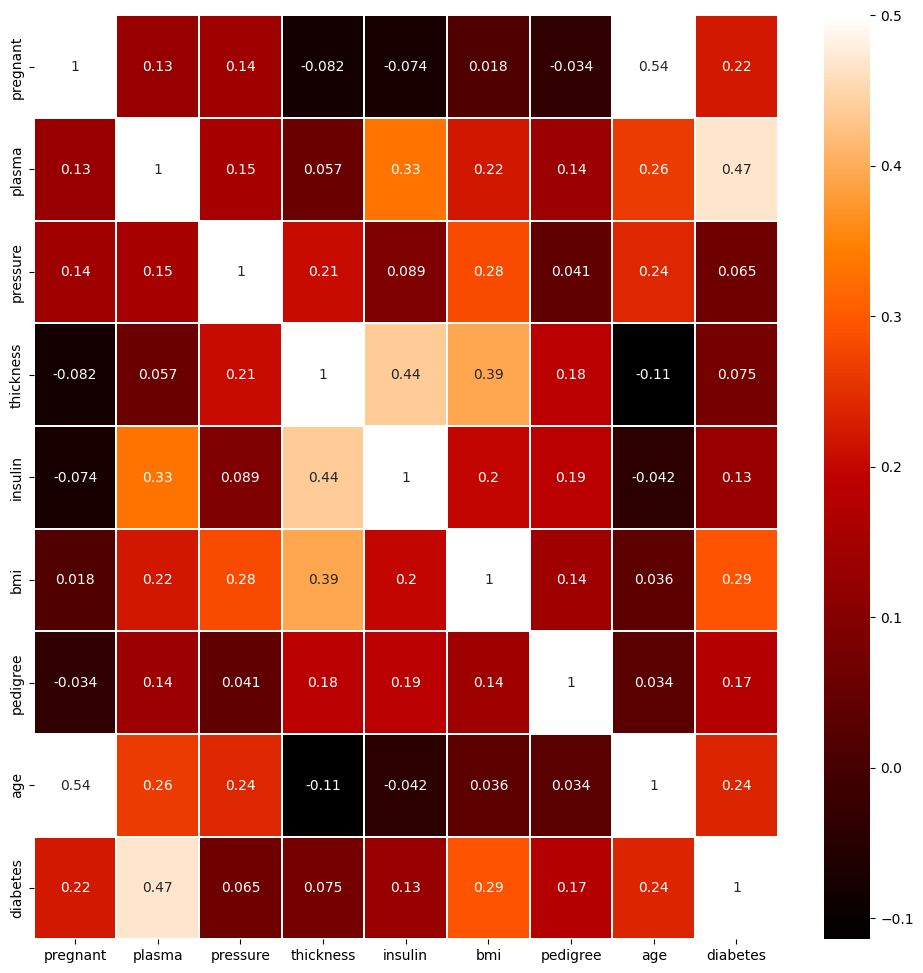

In [22]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap
                ,linecolor='white' , annot=True)
plt.show()

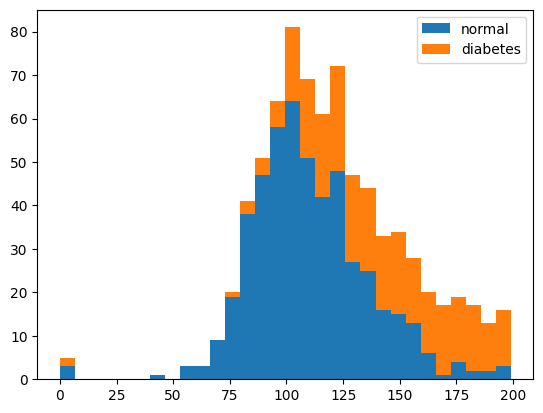

In [25]:
#plasma를 기준으로 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.plasma[df.diabetes==0] , df.plasma[df.diabetes==1]],
        bins=30,histtype='barstacked',label=['normal','diabetes'] )
plt.legend()

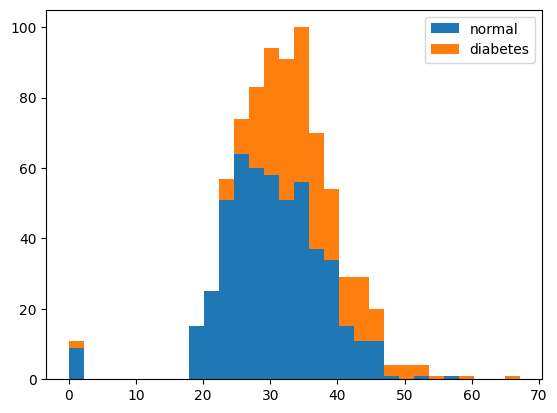

In [26]:
plt.hist(x=[df.bmi[df.diabetes==0] , df.bmi[df.diabetes==1]],
        bins=30,histtype='barstacked',label=['normal','diabetes'] )
plt.legend()

In [ ]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/pima-indians-diabetes3.csv')

In [27]:
# 정보를 X로 지정합니다.
X = df.iloc[:, 0:8]
#당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]
model = Sequential()
model.add(Dense(12, input_dim = 8,activation='relu',name="Dense_1"))
model.add(Dense(8 ,activation='relu', name='Dense_2'))
model.add(Dense(1 ,activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y ,epochs=100,batch_size=5 )

Epoch 1/100
154/154 [==============================] - 0s 654us/step - loss: 16.4597 - accuracy: 0.6458
Epoch 2/100
154/154 [==============================] - 0s 627us/step - loss: 1.1615 - accuracy: 0.5326
Epoch 3/100
154/154 [==============================] - 0s 634us/step - loss: 0.7505 - accuracy: 0.5104
Epoch 4/100
154/154 [==============================] - 0s 634us/step - loss: 0.7119 - accuracy: 0.4987
Epoch 5/100
154/154 [==============================] - 0s 667us/step - loss: 0.6890 - accuracy: 0.5872
Epoch 6/100
154/154 [==============================] - 0s 660us/step - loss: 0.6820 - accuracy: 0.6536
Epoch 7/100
154/154 [==============================] - 0s 647us/step - loss: 0.6773 - accuracy: 0.6523
Epoch 8/100
154/154 [==============================] - 0s 653us/step - loss: 0.6680 - accuracy: 0.6549
Epoch 9/100
154/154 [==============================] - 0s 636us/step - loss: 0.6669 - accuracy: 0.6536
Epoch 10/100
154/154 [==============================] - 0s 641us/step - 

In [29]:
df.shape

(768, 9)

In [ ]:
import pandas as pd

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/iris3.csv')

In [33]:
df.head()
#df.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

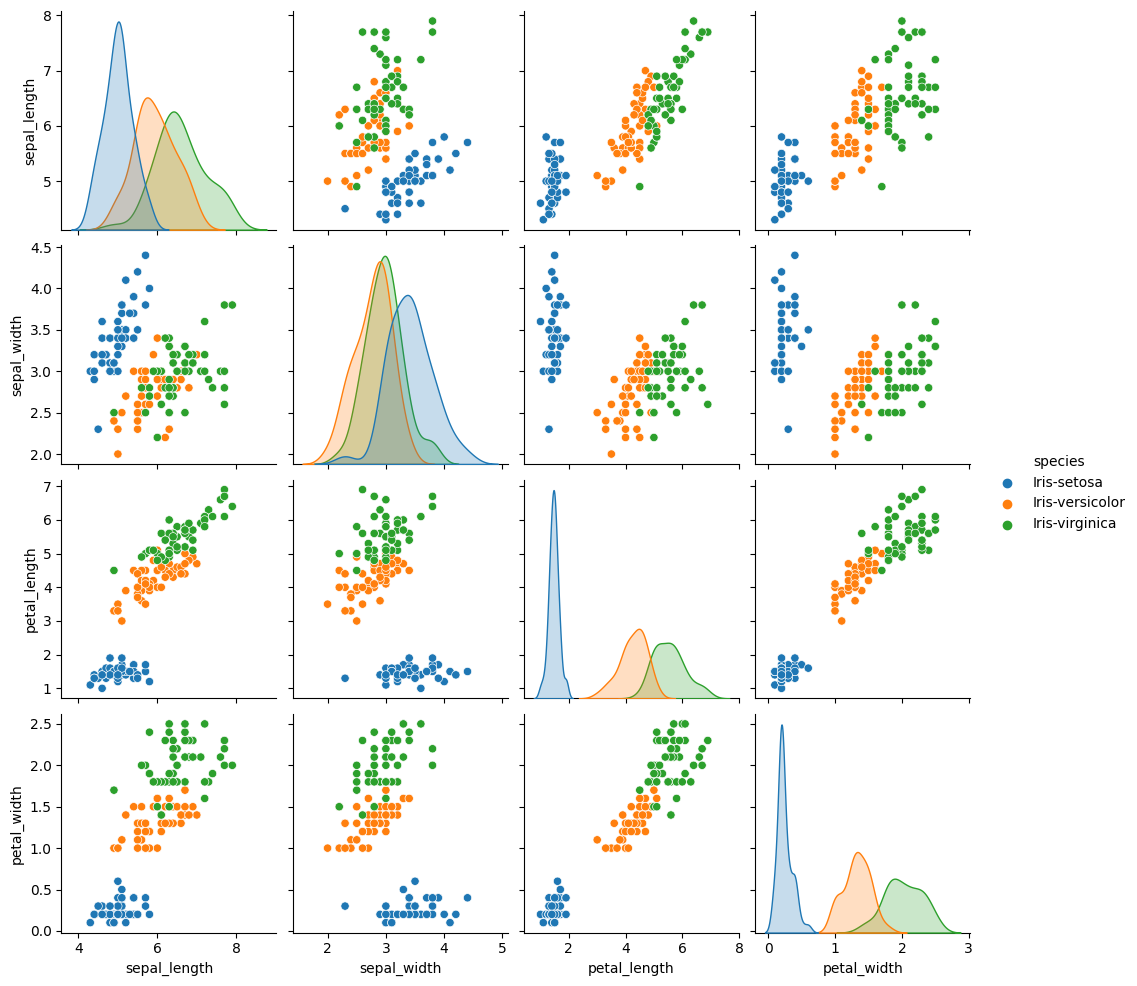

In [34]:
sns.pairplot(df, hue='species')

In [37]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [38]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y) # 이름표(class) : 원-핫 인코딩

In [40]:
# 원-핫 인코딩 결과를 확인합니다.
print(y[20:25])

    Iris-setosa  Iris-versicolor  Iris-virginica
20            1                0               0
21            1                0               0
22            1                0               0
23            1                0               0
24            1                0               0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
# 모델 설정
model = Sequential()
model.add(Dense(12 , input_dim = 4,activation='relu' ))
model.add(Dense(8 , activation='relu' ))
model.add(Dense(3 , activation='softmax' ))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                60        
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=['accuracy']  )
history = model.fit(X, y,epochs=30,batch_size = 5)

Epoch 1/30
30/30 [==============================] - 0s 838us/step - loss: 1.1094 - accuracy: 0.3933
Epoch 2/30
30/30 [==============================] - 0s 793us/step - loss: 0.9754 - accuracy: 0.6667
Epoch 3/30
30/30 [==============================] - 0s 759us/step - loss: 0.9272 - accuracy: 0.6667
Epoch 4/30
30/30 [==============================] - 0s 724us/step - loss: 0.8829 - accuracy: 0.6800
Epoch 5/30
30/30 [==============================] - 0s 828us/step - loss: 0.8423 - accuracy: 0.6733
Epoch 6/30
30/30 [==============================] - 0s 724us/step - loss: 0.8031 - accuracy: 0.6800
Epoch 7/30
30/30 [==============================] - 0s 793us/step - loss: 0.7680 - accuracy: 0.6867
Epoch 8/30
30/30 [==============================] - 0s 690us/step - loss: 0.7325 - accuracy: 0.6933
Epoch 9/30
30/30 [==============================] - 0s 828us/step - loss: 0.7012 - accuracy: 0.7267
Epoch 10/30
30/30 [==============================] - 0s 690us/step - loss: 0.6626 - accuracy: 0.7333

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/sonar3.csv')
print(df.head())
df.shape

     0.02  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167   0.018  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

    0.009  0.0032  0  
0  0.0052  0.0044  0  
1  0.0095  0.0078  0  
2  0.0040  0.0117  0  


(207, 61)

In [8]:
X = df.iloc[:, 0:60] #정보
y = df.iloc[:,60]# class:이름표
print(X[:5])
print(y[:5])

     0.02  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167   0.018  \
0  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
1  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
2  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
3  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   
4  0.3039  ...  0.0104  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057   

   0.0084   0.009  0.0032  
0  0.0049  0.0052  0.0044  
1  0.0164  0.0095  0.0078  
2  0.004

In [14]:
!pip install scikit-learn

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(24,input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.fit(X, y,  epochs=200, batch_size=10 )

Epoch 1/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5314
Epoch 2/200
21/21 [==============================] - 0s 900us/step - loss: 0.6701 - accuracy: 0.5942
Epoch 3/200
21/21 [==============================] - 0s 800us/step - loss: 0.6580 - accuracy: 0.6280
Epoch 4/200
21/21 [==============================] - 0s 803us/step - loss: 0.6479 - accuracy: 0.6425
Epoch 5/200
21/21 [==============================] - 0s 800us/step - loss: 0.6369 - accuracy: 0.6667
Epoch 6/200
21/21 [==============================] - 0s 800us/step - loss: 0.6192 - accuracy: 0.7488
Epoch 7/200
21/21 [==============================] - 0s 850us/step - loss: 0.6072 - accuracy: 0.7536
Epoch 8/200
21/21 [==============================] - 0s 850us/step - loss: 0.5884 - accuracy: 0.8019
Epoch 9/200
21/21 [==============================] - 0s 1000us/step - loss: 0.5634 - accuracy: 0.7826
Epoch 10/200
21/21 [==============================] - 0s 800us/step - loss: 0.5459 - accurac

21/21 [==============================] - 0s 850us/step - loss: 0.1755 - accuracy: 0.9420
Epoch 82/200
21/21 [==============================] - 0s 850us/step - loss: 0.1757 - accuracy: 0.9469
Epoch 83/200
21/21 [==============================] - 0s 800us/step - loss: 0.1743 - accuracy: 0.9420
Epoch 84/200
21/21 [==============================] - 0s 850us/step - loss: 0.1738 - accuracy: 0.9517
Epoch 85/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.9517
Epoch 86/200
21/21 [==============================] - 0s 850us/step - loss: 0.1604 - accuracy: 0.9614
Epoch 87/200
21/21 [==============================] - 0s 800us/step - loss: 0.1716 - accuracy: 0.9565
Epoch 88/200
21/21 [==============================] - 0s 850us/step - loss: 0.1646 - accuracy: 0.9420
Epoch 89/200
21/21 [==============================] - 0s 850us/step - loss: 0.1584 - accuracy: 0.9517
Epoch 90/200
21/21 [==============================] - 0s 850us/step - loss: 0.1569 - accuracy: 0.

21/21 [==============================] - 0s 750us/step - loss: 0.0492 - accuracy: 0.9952
Epoch 161/200
21/21 [==============================] - 0s 800us/step - loss: 0.0445 - accuracy: 0.9952
Epoch 162/200
21/21 [==============================] - 0s 800us/step - loss: 0.0423 - accuracy: 0.9903
Epoch 163/200
21/21 [==============================] - 0s 800us/step - loss: 0.0423 - accuracy: 0.9903
Epoch 164/200
21/21 [==============================] - 0s 800us/step - loss: 0.0421 - accuracy: 0.9952
Epoch 165/200
21/21 [==============================] - 0s 800us/step - loss: 0.0414 - accuracy: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 750us/step - loss: 0.0411 - accuracy: 0.9952
Epoch 167/200
21/21 [==============================] - 0s 750us/step - loss: 0.0418 - accuracy: 0.9952
Epoch 168/200
21/21 [==============================] - 0s 750us/step - loss: 0.0389 - accuracy: 0.9952
Epoch 169/200
21/21 [==============================] - 0s 800us/step - loss: 0.0407 - a

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/sonar3.csv')
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [15]:
# 학습 셋과 테스트 셋을 구분합니다.  70% , 30%
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3 , shuffle=True)
model = Sequential()
model.add(Dense(24,input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.fit(X_train, y_train,  epochs=200, batch_size=10 )

Epoch 1/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5208
Epoch 2/200
15/15 [==============================] - 0s 857us/step - loss: 0.6808 - accuracy: 0.5972
Epoch 3/200
15/15 [==============================] - 0s 857us/step - loss: 0.6735 - accuracy: 0.6181
Epoch 4/200
15/15 [==============================] - 0s 928us/step - loss: 0.6637 - accuracy: 0.6667
Epoch 5/200
15/15 [==============================] - 0s 857us/step - loss: 0.6529 - accuracy: 0.7500
Epoch 6/200
15/15 [==============================] - 0s 929us/step - loss: 0.6404 - accuracy: 0.7222
Epoch 7/200
15/15 [==============================] - 0s 857us/step - loss: 0.6313 - accuracy: 0.7639
Epoch 8/200
15/15 [==============================] - 0s 929us/step - loss: 0.6190 - accuracy: 0.7639
Epoch 9/200
15/15 [==============================] - 0s 863us/step - loss: 0.6115 - accuracy: 0.7569
Epoch 10/200
15/15 [==============================] - 0s 930us/step - loss: 0.6003 - accuracy

15/15 [==============================] - 0s 929us/step - loss: 0.1782 - accuracy: 0.9583
Epoch 82/200
15/15 [==============================] - 0s 857us/step - loss: 0.1774 - accuracy: 0.9514
Epoch 83/200
15/15 [==============================] - 0s 857us/step - loss: 0.1716 - accuracy: 0.9514
Epoch 84/200
15/15 [==============================] - 0s 857us/step - loss: 0.1662 - accuracy: 0.9583
Epoch 85/200
15/15 [==============================] - 0s 857us/step - loss: 0.1646 - accuracy: 0.9583
Epoch 86/200
15/15 [==============================] - 0s 799us/step - loss: 0.1618 - accuracy: 0.9583
Epoch 87/200
15/15 [==============================] - 0s 714us/step - loss: 0.1595 - accuracy: 0.9583
Epoch 88/200
15/15 [==============================] - 0s 714us/step - loss: 0.1547 - accuracy: 0.9583
Epoch 89/200
15/15 [==============================] - 0s 857us/step - loss: 0.1522 - accuracy: 0.9653
Epoch 90/200
15/15 [==============================] - 0s 928us/step - loss: 0.1564 - accuracy: 

15/15 [==============================] - 0s 928us/step - loss: 0.0333 - accuracy: 1.0000
Epoch 161/200
15/15 [==============================] - 0s 929us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 162/200
15/15 [==============================] - 0s 928us/step - loss: 0.0333 - accuracy: 1.0000
Epoch 163/200
15/15 [==============================] - 0s 1000us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 164/200
15/15 [==============================] - 0s 857us/step - loss: 0.0307 - accuracy: 1.0000
Epoch 165/200
15/15 [==============================] - 0s 857us/step - loss: 0.0295 - accuracy: 1.0000
Epoch 166/200
15/15 [==============================] - 0s 786us/step - loss: 0.0304 - accuracy: 1.0000
Epoch 167/200
15/15 [==============================] - 0s 786us/step - loss: 0.0278 - accuracy: 1.0000
Epoch 168/200
15/15 [==============================] - 0s 857us/step - loss: 0.0290 - accuracy: 1.0000
Epoch 169/200
15/15 [==============================] - 0s 857us/step - loss: 0.0273 - 

In [17]:
score = model.evaluate(X_test,y_test)
print("accuracy : " , score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8571
accuracy :  0.8571428656578064


In [18]:
model.save('my_model.hdf5')

In [24]:
from tensorflow.keras.models import Sequential ,load_model 
model = load_model('my_model.hdf5')

In [25]:
score = model.evaluate(X_test,y_test)
print("accuracy : " , score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.3610 - accuracy: 0.8571
accuracy :  0.8571428656578064


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/sonar3.csv')
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [32]:
k = 5
kfold = KFold(n_splits = k, shuffle = True)

acc_score = []
def model_fn():
    model = Sequential()
    model.add(Dense(24,input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

for train_index , test_index in kfold.split(X):
    X_train , X_text = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 학습 모델
    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
    model.fit(X_train, y_train,  epochs=200, batch_size=10 )
    
    score = model.evaluate(X_text,y_test)[1]
    acc_score.append(score)
    
avg_acc_score = sum(acc_score) / k
print(acc_score)
print(avg_acc_score)

Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7346 - accuracy: 0.4606
Epoch 2/200
17/17 [==============================] - 0s 903us/step - loss: 0.6852 - accuracy: 0.5273
Epoch 3/200
17/17 [==============================] - 0s 812us/step - loss: 0.6609 - accuracy: 0.6545
Epoch 4/200
17/17 [==============================] - 0s 813us/step - loss: 0.6451 - accuracy: 0.7394
Epoch 5/200
17/17 [==============================] - 0s 812us/step - loss: 0.6312 - accuracy: 0.7576
Epoch 6/200
17/17 [==============================] - 0s 813us/step - loss: 0.6147 - accuracy: 0.7455
Epoch 7/200
17/17 [==============================] - 0s 813us/step - loss: 0.6000 - accuracy: 0.7636
Epoch 8/200
17/17 [==============================] - 0s 813us/step - loss: 0.5859 - accuracy: 0.7758
Epoch 9/200
17/17 [==============================] - 0s 812us/step - loss: 0.5694 - accuracy: 0.7879
Epoch 10/200
17/17 [==============================] - 0s 812us/step - loss: 0.5624 - accuracy

17/17 [==============================] - 0s 937us/step - loss: 0.1526 - accuracy: 0.9576
Epoch 82/200
17/17 [==============================] - 0s 875us/step - loss: 0.1440 - accuracy: 0.9697
Epoch 83/200
17/17 [==============================] - 0s 875us/step - loss: 0.1496 - accuracy: 0.9697
Epoch 84/200
17/17 [==============================] - 0s 812us/step - loss: 0.1374 - accuracy: 0.9758
Epoch 85/200
17/17 [==============================] - 0s 937us/step - loss: 0.1635 - accuracy: 0.9515
Epoch 86/200
17/17 [==============================] - 0s 937us/step - loss: 0.1371 - accuracy: 0.9818
Epoch 87/200
17/17 [==============================] - 0s 875us/step - loss: 0.1408 - accuracy: 0.9758
Epoch 88/200
17/17 [==============================] - 0s 875us/step - loss: 0.1371 - accuracy: 0.9576
Epoch 89/200
17/17 [==============================] - 0s 938us/step - loss: 0.1422 - accuracy: 0.9515
Epoch 90/200
17/17 [==============================] - 0s 875us/step - loss: 0.1372 - accuracy: 

17/17 [==============================] - 0s 875us/step - loss: 0.0320 - accuracy: 1.0000
Epoch 161/200
17/17 [==============================] - 0s 875us/step - loss: 0.0289 - accuracy: 1.0000
Epoch 162/200
17/17 [==============================] - 0s 813us/step - loss: 0.0292 - accuracy: 1.0000
Epoch 163/200
17/17 [==============================] - 0s 875us/step - loss: 0.0297 - accuracy: 1.0000
Epoch 164/200
17/17 [==============================] - 0s 855us/step - loss: 0.0271 - accuracy: 1.0000
Epoch 165/200
17/17 [==============================] - 0s 750us/step - loss: 0.0288 - accuracy: 1.0000
Epoch 166/200
17/17 [==============================] - 0s 812us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 167/200
17/17 [==============================] - 0s 812us/step - loss: 0.0265 - accuracy: 1.0000
Epoch 168/200
17/17 [==============================] - 0s 812us/step - loss: 0.0238 - accuracy: 1.0000
Epoch 169/200
17/17 [==============================] - 0s 812us/step - loss: 0.0229 - a

17/17 [==============================] - 0s 812us/step - loss: 0.3458 - accuracy: 0.8848
Epoch 40/200
17/17 [==============================] - 0s 812us/step - loss: 0.3425 - accuracy: 0.8788
Epoch 41/200
17/17 [==============================] - 0s 812us/step - loss: 0.3399 - accuracy: 0.8909
Epoch 42/200
17/17 [==============================] - 0s 812us/step - loss: 0.3340 - accuracy: 0.8727
Epoch 43/200
17/17 [==============================] - 0s 813us/step - loss: 0.3347 - accuracy: 0.8909
Epoch 44/200
17/17 [==============================] - 0s 812us/step - loss: 0.3394 - accuracy: 0.8606
Epoch 45/200
17/17 [==============================] - 0s 875us/step - loss: 0.3216 - accuracy: 0.8909
Epoch 46/200
17/17 [==============================] - 0s 875us/step - loss: 0.3149 - accuracy: 0.8848
Epoch 47/200
17/17 [==============================] - 0s 813us/step - loss: 0.3136 - accuracy: 0.8970
Epoch 48/200
17/17 [==============================] - 0s 875us/step - loss: 0.3079 - accuracy: 

17/17 [==============================] - 0s 938us/step - loss: 0.0955 - accuracy: 0.9818
Epoch 120/200
17/17 [==============================] - 0s 812us/step - loss: 0.0918 - accuracy: 0.9818
Epoch 121/200
17/17 [==============================] - 0s 750us/step - loss: 0.0921 - accuracy: 0.9879
Epoch 122/200
17/17 [==============================] - 0s 750us/step - loss: 0.0914 - accuracy: 0.9818
Epoch 123/200
17/17 [==============================] - 0s 750us/step - loss: 0.0891 - accuracy: 0.9818
Epoch 124/200
17/17 [==============================] - 0s 812us/step - loss: 0.0840 - accuracy: 0.9879
Epoch 125/200
17/17 [==============================] - 0s 812us/step - loss: 0.0948 - accuracy: 0.9879
Epoch 126/200
17/17 [==============================] - 0s 812us/step - loss: 0.0817 - accuracy: 0.9939
Epoch 127/200
17/17 [==============================] - 0s 812us/step - loss: 0.0808 - accuracy: 0.9818
Epoch 128/200
17/17 [==============================] - 0s 875us/step - loss: 0.0785 - a

17/17 [==============================] - 0s 813us/step - loss: 0.0214 - accuracy: 1.0000
Epoch 199/200
17/17 [==============================] - 0s 812us/step - loss: 0.0204 - accuracy: 1.0000
Epoch 200/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.7619
Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5361
Epoch 2/200
17/17 [==============================] - 0s 875us/step - loss: 0.6605 - accuracy: 0.5482
Epoch 3/200
17/17 [==============================] - 0s 812us/step - loss: 0.6458 - accuracy: 0.5482
Epoch 4/200
17/17 [==============================] - 0s 812us/step - loss: 0.6340 - accuracy: 0.6265
Epoch 5/200
17/17 [==============================] - 0s 812us/step - loss: 0.6181 - accuracy: 0.6386
Epoch 6/200
17/17 [==============================] - 0s 875us/step - loss: 0.6009 - accuracy: 0.7771
Epoch 7/200
17/17 [==============================] - 0s 812us/step - loss: 0.5791 - accuracy: 0.7470
Epoc

17/17 [==============================] - 0s 875us/step - loss: 0.1703 - accuracy: 0.9458
Epoch 78/200
17/17 [==============================] - 0s 875us/step - loss: 0.1783 - accuracy: 0.9398
Epoch 79/200
17/17 [==============================] - 0s 937us/step - loss: 0.1733 - accuracy: 0.9578
Epoch 80/200
17/17 [==============================] - 0s 937us/step - loss: 0.1588 - accuracy: 0.9699
Epoch 81/200
17/17 [==============================] - 0s 875us/step - loss: 0.1570 - accuracy: 0.9699
Epoch 82/200
17/17 [==============================] - 0s 812us/step - loss: 0.1559 - accuracy: 0.9518
Epoch 83/200
17/17 [==============================] - 0s 750us/step - loss: 0.1473 - accuracy: 0.9819
Epoch 84/200
17/17 [==============================] - 0s 813us/step - loss: 0.1544 - accuracy: 0.9578
Epoch 85/200
17/17 [==============================] - 0s 750us/step - loss: 0.1448 - accuracy: 0.9819
Epoch 86/200
17/17 [==============================] - 0s 812us/step - loss: 0.1442 - accuracy: 

17/17 [==============================] - 0s 771us/step - loss: 0.0381 - accuracy: 1.0000
Epoch 157/200
17/17 [==============================] - 0s 812us/step - loss: 0.0391 - accuracy: 1.0000
Epoch 158/200
17/17 [==============================] - 0s 812us/step - loss: 0.0401 - accuracy: 1.0000
Epoch 159/200
17/17 [==============================] - 0s 812us/step - loss: 0.0364 - accuracy: 1.0000
Epoch 160/200
17/17 [==============================] - 0s 812us/step - loss: 0.0366 - accuracy: 1.0000
Epoch 161/200
17/17 [==============================] - 0s 812us/step - loss: 0.0354 - accuracy: 1.0000
Epoch 162/200
17/17 [==============================] - 0s 875us/step - loss: 0.0344 - accuracy: 1.0000
Epoch 163/200
17/17 [==============================] - 0s 812us/step - loss: 0.0350 - accuracy: 1.0000
Epoch 164/200
17/17 [==============================] - 0s 875us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 165/200
17/17 [==============================] - 0s 875us/step - loss: 0.0315 - a

17/17 [==============================] - 0s 812us/step - loss: 0.3925 - accuracy: 0.8373
Epoch 29/200
17/17 [==============================] - 0s 812us/step - loss: 0.3833 - accuracy: 0.8614
Epoch 30/200
17/17 [==============================] - 0s 813us/step - loss: 0.3759 - accuracy: 0.8434
Epoch 31/200
17/17 [==============================] - 0s 812us/step - loss: 0.3740 - accuracy: 0.8313
Epoch 32/200
17/17 [==============================] - 0s 812us/step - loss: 0.3726 - accuracy: 0.8554
Epoch 33/200
17/17 [==============================] - 0s 750us/step - loss: 0.3736 - accuracy: 0.8193
Epoch 34/200
17/17 [==============================] - 0s 750us/step - loss: 0.3594 - accuracy: 0.8434
Epoch 35/200
17/17 [==============================] - 0s 750us/step - loss: 0.3568 - accuracy: 0.8554
Epoch 36/200
17/17 [==============================] - 0s 750us/step - loss: 0.3497 - accuracy: 0.8554
Epoch 37/200
17/17 [==============================] - 0s 687us/step - loss: 0.3468 - accuracy: 

17/17 [==============================] - 0s 812us/step - loss: 0.1720 - accuracy: 0.9398
Epoch 109/200
17/17 [==============================] - 0s 875us/step - loss: 0.1702 - accuracy: 0.9458
Epoch 110/200
17/17 [==============================] - 0s 812us/step - loss: 0.1706 - accuracy: 0.9458
Epoch 111/200
17/17 [==============================] - 0s 750us/step - loss: 0.1677 - accuracy: 0.9337
Epoch 112/200
17/17 [==============================] - 0s 875us/step - loss: 0.1652 - accuracy: 0.9398
Epoch 113/200
17/17 [==============================] - 0s 812us/step - loss: 0.1632 - accuracy: 0.9458
Epoch 114/200
17/17 [==============================] - 0s 750us/step - loss: 0.1600 - accuracy: 0.9398
Epoch 115/200
17/17 [==============================] - 0s 812us/step - loss: 0.1635 - accuracy: 0.9518
Epoch 116/200
17/17 [==============================] - 0s 875us/step - loss: 0.1725 - accuracy: 0.9277
Epoch 117/200
17/17 [==============================] - 0s 875us/step - loss: 0.1576 - a

17/17 [==============================] - 0s 875us/step - loss: 0.0628 - accuracy: 0.9940
Epoch 188/200
17/17 [==============================] - 0s 875us/step - loss: 0.0570 - accuracy: 1.0000
Epoch 189/200
17/17 [==============================] - 0s 875us/step - loss: 0.0531 - accuracy: 0.9940
Epoch 190/200
17/17 [==============================] - 0s 875us/step - loss: 0.0603 - accuracy: 1.0000
Epoch 191/200
17/17 [==============================] - 0s 875us/step - loss: 0.0532 - accuracy: 1.0000
Epoch 192/200
17/17 [==============================] - 0s 875us/step - loss: 0.0491 - accuracy: 0.9940
Epoch 193/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 1.0000
Epoch 194/200
17/17 [==============================] - 0s 875us/step - loss: 0.0515 - accuracy: 0.9940
Epoch 195/200
17/17 [==============================] - 0s 750us/step - loss: 0.0465 - accuracy: 1.0000
Epoch 196/200
17/17 [==============================] - 0s 750us/step - loss: 0.0461 - acc

17/17 [==============================] - 0s 875us/step - loss: 0.2220 - accuracy: 0.9217
Epoch 60/200
17/17 [==============================] - 0s 875us/step - loss: 0.2194 - accuracy: 0.9458
Epoch 61/200
17/17 [==============================] - 0s 875us/step - loss: 0.2169 - accuracy: 0.9398
Epoch 62/200
17/17 [==============================] - 0s 875us/step - loss: 0.2149 - accuracy: 0.9217
Epoch 63/200
17/17 [==============================] - 0s 938us/step - loss: 0.2229 - accuracy: 0.9277
Epoch 64/200
17/17 [==============================] - 0s 872us/step - loss: 0.2171 - accuracy: 0.9518
Epoch 65/200
17/17 [==============================] - 0s 813us/step - loss: 0.2124 - accuracy: 0.9277
Epoch 66/200
17/17 [==============================] - 0s 938us/step - loss: 0.2043 - accuracy: 0.9217
Epoch 67/200
17/17 [==============================] - 0s 937us/step - loss: 0.1977 - accuracy: 0.9518
Epoch 68/200
17/17 [==============================] - 0s 875us/step - loss: 0.1947 - accuracy: 

17/17 [==============================] - 0s 750us/step - loss: 0.0579 - accuracy: 0.9940
Epoch 140/200
17/17 [==============================] - 0s 750us/step - loss: 0.0591 - accuracy: 0.9940
Epoch 141/200
17/17 [==============================] - 0s 750us/step - loss: 0.0550 - accuracy: 0.9940
Epoch 142/200
17/17 [==============================] - 0s 812us/step - loss: 0.0552 - accuracy: 0.9940
Epoch 143/200
17/17 [==============================] - 0s 812us/step - loss: 0.0530 - accuracy: 0.9940
Epoch 144/200
17/17 [==============================] - 0s 812us/step - loss: 0.0545 - accuracy: 0.9940
Epoch 145/200
17/17 [==============================] - 0s 812us/step - loss: 0.0536 - accuracy: 0.9940
Epoch 146/200
17/17 [==============================] - 0s 875us/step - loss: 0.0519 - accuracy: 0.9940
Epoch 147/200
17/17 [==============================] - 0s 875us/step - loss: 0.0572 - accuracy: 0.9940
Epoch 148/200
17/17 [==============================] - 0s 812us/step - loss: 0.0501 - a

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/wine.csv")
df

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6492,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6493,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6494,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [35]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.2, shuffle=True)

In [37]:
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=50, batch_size=500,validation_split=0.25)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 30)                390       
                                                                 
 dense_35 (Dense)            (None, 12)                372       
                                                                 
 dense_36 (Dense)            (None, 8)                 104       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 17ms/step - loss: 3.7066 - accuracy: 0.2453 - val_loss: 1.1923 - val_accuracy: 0.2771
Epoch 2/50
8/8 [==============================] 

In [39]:
score = model.evaluate(X_test,y_test);
print(score)

41/41 [==============================] - 0s 700us/step - loss: 0.0982 - accuracy: 0.9723
[0.0982067808508873, 0.9723076820373535]


In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = "{epoch:02d}-{val_accuracy:.4f}.hdf5" 
checkpointer = ModelCheckpoint(filepath=modelpath,verbose=1)
history = model.fit(X_train,y_train, epochs=50, batch_size=500
          ,validation_split=0.25,verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to 01-0.9654.hdf5

Epoch 2: saving model to 02-0.9654.hdf5

Epoch 3: saving model to 03-0.9661.hdf5

Epoch 4: saving model to 04-0.9707.hdf5

Epoch 5: saving model to 05-0.9684.hdf5

Epoch 6: saving model to 06-0.9692.hdf5

Epoch 7: saving model to 07-0.9692.hdf5

Epoch 8: saving model to 08-0.9684.hdf5

Epoch 9: saving model to 09-0.9707.hdf5

Epoch 10: saving model to 10-0.9677.hdf5

Epoch 11: saving model to 11-0.9715.hdf5

Epoch 12: saving model to 12-0.9731.hdf5

Epoch 13: saving model to 13-0.9700.hdf5

Epoch 14: saving model to 14-0.9731.hdf5

Epoch 15: saving model to 15-0.9761.hdf5

Epoch 16: saving model to 16-0.9715.hdf5

Epoch 17: saving model to 17-0.9738.hdf5

Epoch 18: saving model to 18-0.9761.hdf5

Epoch 19: saving model to 19-0.9784.hdf5

Epoch 20: saving model to 20-0.9769.hdf5

Epoch 21: saving model to 21-0.9754.hdf5

Epoch 22: saving model to 22-0.9784.hdf5

Epoch 23: saving model to 23-0.9754.hdf5

Epoch 24: saving model to 24-0.9731.hdf5



In [42]:
score = model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 699us/step - loss: 0.0645 - accuracy: 0.9854


In [43]:
history = model.fit(X_train,y_train, epochs=2000, batch_size=500
          ,validation_split=0.25,verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to 01-0.9831.hdf5

Epoch 2: saving model to 02-0.9831.hdf5

Epoch 3: saving model to 03-0.9823.hdf5

Epoch 4: saving model to 04-0.9815.hdf5

Epoch 5: saving model to 05-0.9823.hdf5

Epoch 6: saving model to 06-0.9838.hdf5

Epoch 7: saving model to 07-0.9838.hdf5

Epoch 8: saving model to 08-0.9823.hdf5

Epoch 9: saving model to 09-0.9823.hdf5

Epoch 10: saving model to 10-0.9831.hdf5

Epoch 11: saving model to 11-0.9838.hdf5

Epoch 12: saving model to 12-0.9846.hdf5

Epoch 13: saving model to 13-0.9838.hdf5

Epoch 14: saving model to 14-0.9846.hdf5

Epoch 15: saving model to 15-0.9846.hdf5

Epoch 16: saving model to 16-0.9854.hdf5

Epoch 17: saving model to 17-0.9831.hdf5

Epoch 18: saving model to 18-0.9823.hdf5

Epoch 19: saving model to 19-0.9854.hdf5

Epoch 20: saving model to 20-0.9861.hdf5

Epoch 21: saving model to 21-0.9846.hdf5

Epoch 22: saving model to 22-0.9854.hdf5

Epoch 23: saving model to 23-0.9846.hdf5

Epoch 24: saving model to 24-0.9838.hdf5




Epoch 192: saving model to 192-0.9877.hdf5

Epoch 193: saving model to 193-0.9761.hdf5

Epoch 194: saving model to 194-0.9831.hdf5

Epoch 195: saving model to 195-0.9869.hdf5

Epoch 196: saving model to 196-0.9877.hdf5

Epoch 197: saving model to 197-0.9854.hdf5

Epoch 198: saving model to 198-0.9885.hdf5

Epoch 199: saving model to 199-0.9885.hdf5

Epoch 200: saving model to 200-0.9885.hdf5

Epoch 201: saving model to 201-0.9885.hdf5

Epoch 202: saving model to 202-0.9861.hdf5

Epoch 203: saving model to 203-0.9892.hdf5

Epoch 204: saving model to 204-0.9861.hdf5

Epoch 205: saving model to 205-0.9885.hdf5

Epoch 206: saving model to 206-0.9877.hdf5

Epoch 207: saving model to 207-0.9877.hdf5

Epoch 208: saving model to 208-0.9877.hdf5

Epoch 209: saving model to 209-0.9892.hdf5

Epoch 210: saving model to 210-0.9885.hdf5

Epoch 211: saving model to 211-0.9869.hdf5

Epoch 212: saving model to 212-0.9885.hdf5

Epoch 213: saving model to 213-0.9885.hdf5

Epoch 214: saving model to 214-


Epoch 379: saving model to 379-0.9885.hdf5

Epoch 380: saving model to 380-0.9885.hdf5

Epoch 381: saving model to 381-0.9869.hdf5

Epoch 382: saving model to 382-0.9869.hdf5

Epoch 383: saving model to 383-0.9892.hdf5

Epoch 384: saving model to 384-0.9885.hdf5

Epoch 385: saving model to 385-0.9885.hdf5

Epoch 386: saving model to 386-0.9861.hdf5

Epoch 387: saving model to 387-0.9885.hdf5

Epoch 388: saving model to 388-0.9885.hdf5

Epoch 389: saving model to 389-0.9877.hdf5

Epoch 390: saving model to 390-0.9885.hdf5

Epoch 391: saving model to 391-0.9892.hdf5

Epoch 392: saving model to 392-0.9885.hdf5

Epoch 393: saving model to 393-0.9892.hdf5

Epoch 394: saving model to 394-0.9885.hdf5

Epoch 395: saving model to 395-0.9885.hdf5

Epoch 396: saving model to 396-0.9885.hdf5

Epoch 397: saving model to 397-0.9885.hdf5

Epoch 398: saving model to 398-0.9885.hdf5

Epoch 399: saving model to 399-0.9892.hdf5

Epoch 400: saving model to 400-0.9885.hdf5

Epoch 401: saving model to 401-


Epoch 566: saving model to 566-0.9885.hdf5

Epoch 567: saving model to 567-0.9892.hdf5

Epoch 568: saving model to 568-0.9908.hdf5

Epoch 569: saving model to 569-0.9892.hdf5

Epoch 570: saving model to 570-0.9877.hdf5

Epoch 571: saving model to 571-0.9892.hdf5

Epoch 572: saving model to 572-0.9915.hdf5

Epoch 573: saving model to 573-0.9900.hdf5

Epoch 574: saving model to 574-0.9900.hdf5

Epoch 575: saving model to 575-0.9877.hdf5

Epoch 576: saving model to 576-0.9885.hdf5

Epoch 577: saving model to 577-0.9900.hdf5

Epoch 578: saving model to 578-0.9892.hdf5

Epoch 579: saving model to 579-0.9900.hdf5

Epoch 580: saving model to 580-0.9885.hdf5

Epoch 581: saving model to 581-0.9900.hdf5

Epoch 582: saving model to 582-0.9885.hdf5

Epoch 583: saving model to 583-0.9885.hdf5

Epoch 584: saving model to 584-0.9885.hdf5

Epoch 585: saving model to 585-0.9885.hdf5

Epoch 586: saving model to 586-0.9885.hdf5

Epoch 587: saving model to 587-0.9915.hdf5

Epoch 588: saving model to 588-


Epoch 753: saving model to 753-0.9915.hdf5

Epoch 754: saving model to 754-0.9900.hdf5

Epoch 755: saving model to 755-0.9892.hdf5

Epoch 756: saving model to 756-0.9892.hdf5

Epoch 757: saving model to 757-0.9900.hdf5

Epoch 758: saving model to 758-0.9885.hdf5

Epoch 759: saving model to 759-0.9892.hdf5

Epoch 760: saving model to 760-0.9908.hdf5

Epoch 761: saving model to 761-0.9908.hdf5

Epoch 762: saving model to 762-0.9892.hdf5

Epoch 763: saving model to 763-0.9900.hdf5

Epoch 764: saving model to 764-0.9900.hdf5

Epoch 765: saving model to 765-0.9877.hdf5

Epoch 766: saving model to 766-0.9885.hdf5

Epoch 767: saving model to 767-0.9885.hdf5

Epoch 768: saving model to 768-0.9892.hdf5

Epoch 769: saving model to 769-0.9892.hdf5

Epoch 770: saving model to 770-0.9877.hdf5

Epoch 771: saving model to 771-0.9908.hdf5

Epoch 772: saving model to 772-0.9908.hdf5

Epoch 773: saving model to 773-0.9885.hdf5

Epoch 774: saving model to 774-0.9900.hdf5

Epoch 775: saving model to 775-


Epoch 940: saving model to 940-0.9900.hdf5

Epoch 941: saving model to 941-0.9877.hdf5

Epoch 942: saving model to 942-0.9877.hdf5

Epoch 943: saving model to 943-0.9915.hdf5

Epoch 944: saving model to 944-0.9908.hdf5

Epoch 945: saving model to 945-0.9877.hdf5

Epoch 946: saving model to 946-0.9885.hdf5

Epoch 947: saving model to 947-0.9885.hdf5

Epoch 948: saving model to 948-0.9877.hdf5

Epoch 949: saving model to 949-0.9885.hdf5

Epoch 950: saving model to 950-0.9908.hdf5

Epoch 951: saving model to 951-0.9900.hdf5

Epoch 952: saving model to 952-0.9908.hdf5

Epoch 953: saving model to 953-0.9892.hdf5

Epoch 954: saving model to 954-0.9900.hdf5

Epoch 955: saving model to 955-0.9885.hdf5

Epoch 956: saving model to 956-0.9900.hdf5

Epoch 957: saving model to 957-0.9877.hdf5

Epoch 958: saving model to 958-0.9831.hdf5

Epoch 959: saving model to 959-0.9900.hdf5

Epoch 960: saving model to 960-0.9908.hdf5

Epoch 961: saving model to 961-0.9892.hdf5

Epoch 962: saving model to 962-


Epoch 1121: saving model to 1121-0.9900.hdf5

Epoch 1122: saving model to 1122-0.9900.hdf5

Epoch 1123: saving model to 1123-0.9900.hdf5

Epoch 1124: saving model to 1124-0.9892.hdf5

Epoch 1125: saving model to 1125-0.9908.hdf5

Epoch 1126: saving model to 1126-0.9908.hdf5

Epoch 1127: saving model to 1127-0.9908.hdf5

Epoch 1128: saving model to 1128-0.9908.hdf5

Epoch 1129: saving model to 1129-0.9908.hdf5

Epoch 1130: saving model to 1130-0.9908.hdf5

Epoch 1131: saving model to 1131-0.9885.hdf5

Epoch 1132: saving model to 1132-0.9908.hdf5

Epoch 1133: saving model to 1133-0.9900.hdf5

Epoch 1134: saving model to 1134-0.9900.hdf5

Epoch 1135: saving model to 1135-0.9885.hdf5

Epoch 1136: saving model to 1136-0.9900.hdf5

Epoch 1137: saving model to 1137-0.9915.hdf5

Epoch 1138: saving model to 1138-0.9877.hdf5

Epoch 1139: saving model to 1139-0.9923.hdf5

Epoch 1140: saving model to 1140-0.9908.hdf5

Epoch 1141: saving model to 1141-0.9915.hdf5

Epoch 1142: saving model to 1142-


Epoch 1300: saving model to 1300-0.9908.hdf5

Epoch 1301: saving model to 1301-0.9877.hdf5

Epoch 1302: saving model to 1302-0.9900.hdf5

Epoch 1303: saving model to 1303-0.9915.hdf5

Epoch 1304: saving model to 1304-0.9915.hdf5

Epoch 1305: saving model to 1305-0.9892.hdf5

Epoch 1306: saving model to 1306-0.9892.hdf5

Epoch 1307: saving model to 1307-0.9915.hdf5

Epoch 1308: saving model to 1308-0.9923.hdf5

Epoch 1309: saving model to 1309-0.9915.hdf5

Epoch 1310: saving model to 1310-0.9915.hdf5

Epoch 1311: saving model to 1311-0.9915.hdf5

Epoch 1312: saving model to 1312-0.9915.hdf5

Epoch 1313: saving model to 1313-0.9900.hdf5

Epoch 1314: saving model to 1314-0.9900.hdf5

Epoch 1315: saving model to 1315-0.9900.hdf5

Epoch 1316: saving model to 1316-0.9915.hdf5

Epoch 1317: saving model to 1317-0.9915.hdf5

Epoch 1318: saving model to 1318-0.9908.hdf5

Epoch 1319: saving model to 1319-0.9908.hdf5

Epoch 1320: saving model to 1320-0.9877.hdf5

Epoch 1321: saving model to 1321-


Epoch 1479: saving model to 1479-0.9923.hdf5

Epoch 1480: saving model to 1480-0.9900.hdf5

Epoch 1481: saving model to 1481-0.9900.hdf5

Epoch 1482: saving model to 1482-0.9908.hdf5

Epoch 1483: saving model to 1483-0.9915.hdf5

Epoch 1484: saving model to 1484-0.9908.hdf5

Epoch 1485: saving model to 1485-0.9908.hdf5

Epoch 1486: saving model to 1486-0.9915.hdf5

Epoch 1487: saving model to 1487-0.9923.hdf5

Epoch 1488: saving model to 1488-0.9908.hdf5

Epoch 1489: saving model to 1489-0.9908.hdf5

Epoch 1490: saving model to 1490-0.9908.hdf5

Epoch 1491: saving model to 1491-0.9915.hdf5

Epoch 1492: saving model to 1492-0.9915.hdf5

Epoch 1493: saving model to 1493-0.9900.hdf5

Epoch 1494: saving model to 1494-0.9892.hdf5

Epoch 1495: saving model to 1495-0.9923.hdf5

Epoch 1496: saving model to 1496-0.9923.hdf5

Epoch 1497: saving model to 1497-0.9892.hdf5

Epoch 1498: saving model to 1498-0.9915.hdf5

Epoch 1499: saving model to 1499-0.9900.hdf5

Epoch 1500: saving model to 1500-


Epoch 1658: saving model to 1658-0.9915.hdf5

Epoch 1659: saving model to 1659-0.9900.hdf5

Epoch 1660: saving model to 1660-0.9923.hdf5

Epoch 1661: saving model to 1661-0.9915.hdf5

Epoch 1662: saving model to 1662-0.9915.hdf5

Epoch 1663: saving model to 1663-0.9915.hdf5

Epoch 1664: saving model to 1664-0.9908.hdf5

Epoch 1665: saving model to 1665-0.9923.hdf5

Epoch 1666: saving model to 1666-0.9900.hdf5

Epoch 1667: saving model to 1667-0.9915.hdf5

Epoch 1668: saving model to 1668-0.9908.hdf5

Epoch 1669: saving model to 1669-0.9923.hdf5

Epoch 1670: saving model to 1670-0.9885.hdf5

Epoch 1671: saving model to 1671-0.9915.hdf5

Epoch 1672: saving model to 1672-0.9892.hdf5

Epoch 1673: saving model to 1673-0.9908.hdf5

Epoch 1674: saving model to 1674-0.9900.hdf5

Epoch 1675: saving model to 1675-0.9915.hdf5

Epoch 1676: saving model to 1676-0.9915.hdf5

Epoch 1677: saving model to 1677-0.9923.hdf5

Epoch 1678: saving model to 1678-0.9915.hdf5

Epoch 1679: saving model to 1679-


Epoch 1837: saving model to 1837-0.9923.hdf5

Epoch 1838: saving model to 1838-0.9923.hdf5

Epoch 1839: saving model to 1839-0.9931.hdf5

Epoch 1840: saving model to 1840-0.9908.hdf5

Epoch 1841: saving model to 1841-0.9900.hdf5

Epoch 1842: saving model to 1842-0.9915.hdf5

Epoch 1843: saving model to 1843-0.9915.hdf5

Epoch 1844: saving model to 1844-0.9908.hdf5

Epoch 1845: saving model to 1845-0.9908.hdf5

Epoch 1846: saving model to 1846-0.9915.hdf5

Epoch 1847: saving model to 1847-0.9908.hdf5

Epoch 1848: saving model to 1848-0.9915.hdf5

Epoch 1849: saving model to 1849-0.9915.hdf5

Epoch 1850: saving model to 1850-0.9908.hdf5

Epoch 1851: saving model to 1851-0.9915.hdf5

Epoch 1852: saving model to 1852-0.9900.hdf5

Epoch 1853: saving model to 1853-0.9900.hdf5

Epoch 1854: saving model to 1854-0.9908.hdf5

Epoch 1855: saving model to 1855-0.9908.hdf5

Epoch 1856: saving model to 1856-0.9908.hdf5

Epoch 1857: saving model to 1857-0.9908.hdf5

Epoch 1858: saving model to 1858-

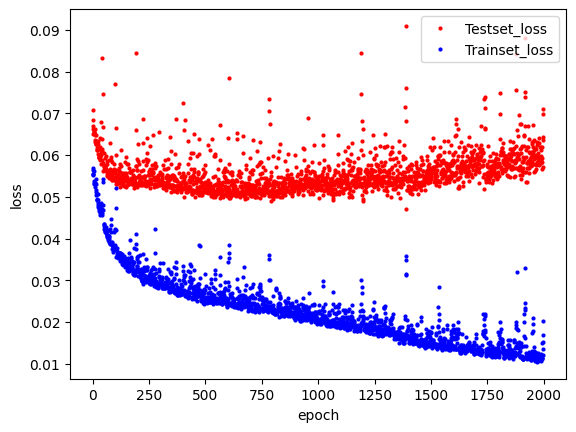

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
hist_df = pd.DataFrame(history.history);
hist_df 
# loss : Train_loss 
# val_loss : Test_loss
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss,"o",c="red",markersize=2,label='Testset_loss')
plt.plot(x_len, y_loss,"o",c="blue",markersize=2,label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = "bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,verbose=0,
                               monitor='val_loss',save_best_only=True)
history = model.fit(X_train,y_train, epochs=2000, batch_size=500
          ,validation_split=0.25,verbose=1
          ,callbacks=[early_stopping_callback,checkpointer])

In [50]:
score = model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 700us/step - loss: 0.0771 - accuracy: 0.9908


In [72]:
import pandas as pd
import seaborn as sns


In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/hk_AI-RPA/main/python/deep_data/house_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [64]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [65]:
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [66]:
df = df.fillna(df.mean())
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [67]:
df_corr=df.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [70]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

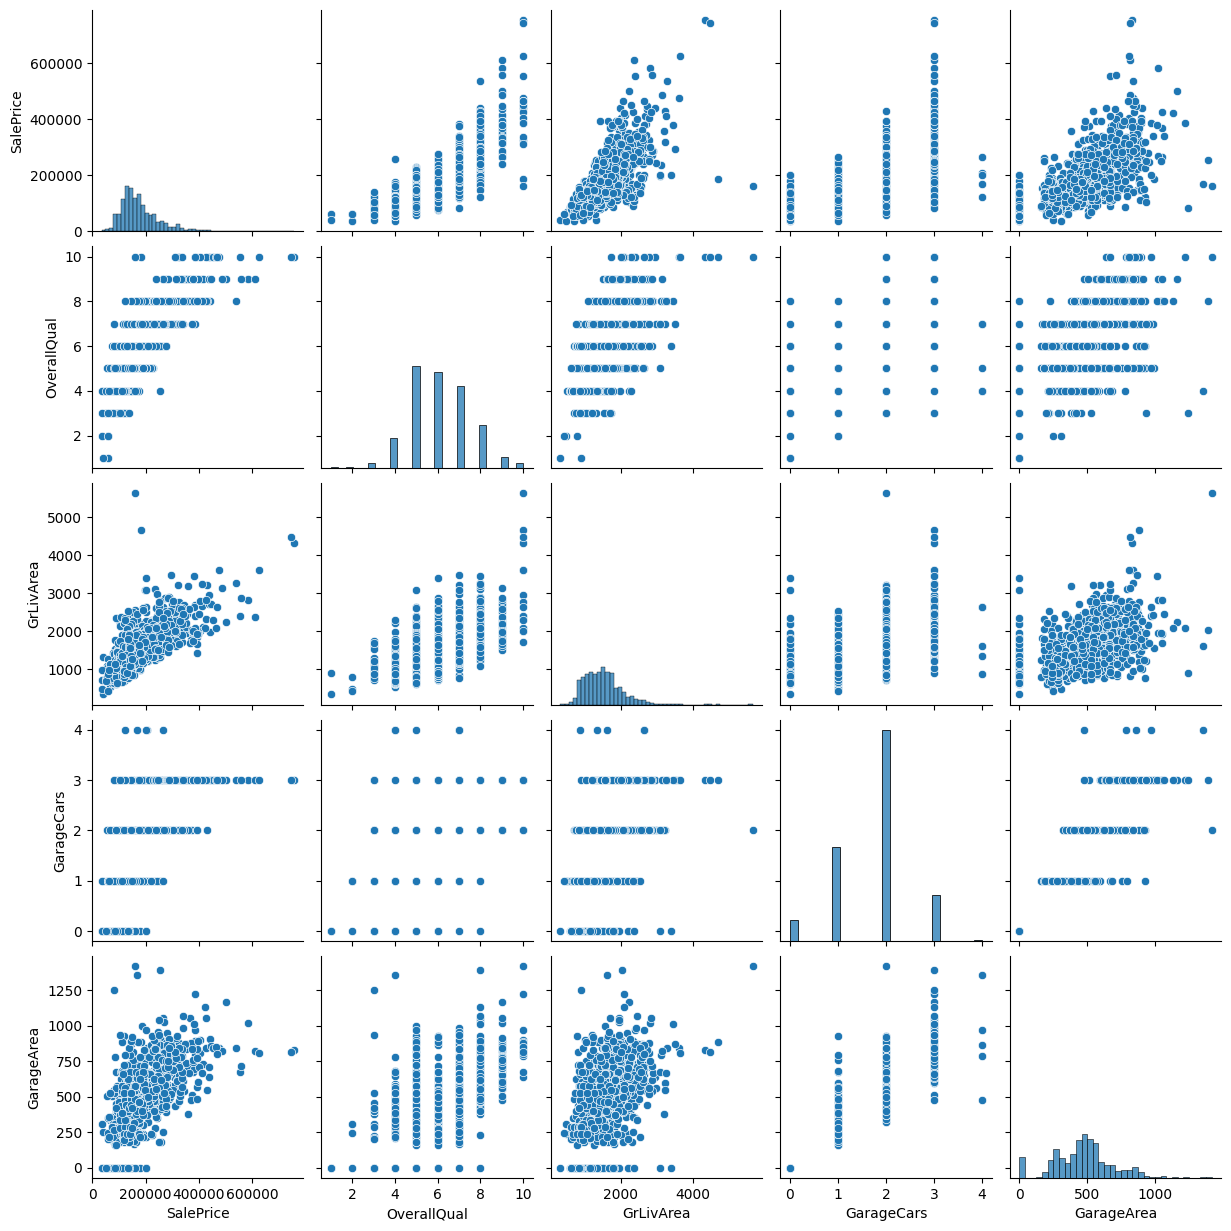

In [74]:
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea']
sns.pairplot(df[cols])
plt.show()    

In [80]:
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X = df[cols_train]
y = df['SalePrice'].values

X.shape
X.shape[1]

5

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(10, input_dim=X.shape[1],activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam' , loss='mean_squared_error')

modelpath = 'house.hdf5'

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
checkpointer = ModelCheckpoint(filepath=modelpath,
                    monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train,y_train,validation_split=0.25,epochs=2000,batch_size=32
         ,callbacks=[early_stopping_callback,checkpointer])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 10)                60        
                                                                 
 dense_67 (Dense)            (None, 30)                330       
                                                                 
 dense_68 (Dense)            (None, 40)                1240      
                                                                 
 dense_69 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
28/28 [==============================] - 1s 5ms/step - loss: 39199010816.0000 - val_loss: 41238847488.0000
Epoch 2/2000
28/28 [==============================] - 0s 2ms/st

Epoch 62/2000
28/28 [==============================] - 0s 2ms/step - loss: 2350167040.0000 - val_loss: 2247693312.0000
Epoch 63/2000
28/28 [==============================] - 0s 2ms/step - loss: 2366924032.0000 - val_loss: 2249184512.0000
Epoch 64/2000
28/28 [==============================] - 0s 2ms/step - loss: 2344631552.0000 - val_loss: 2232196352.0000
Epoch 65/2000
28/28 [==============================] - 0s 2ms/step - loss: 2342563072.0000 - val_loss: 2234342400.0000
Epoch 66/2000
28/28 [==============================] - 0s 2ms/step - loss: 2341803776.0000 - val_loss: 2229706496.0000
Epoch 67/2000
28/28 [==============================] - 0s 2ms/step - loss: 2342658816.0000 - val_loss: 2218672896.0000
Epoch 68/2000
28/28 [==============================] - 0s 2ms/step - loss: 2358174464.0000 - val_loss: 2277202944.0000
Epoch 69/2000
28/28 [==============================] - 0s 2ms/step - loss: 2326840064.0000 - val_loss: 2215827712.0000
Epoch 70/2000
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 2249643520.0000 - val_loss: 2140631936.0000
Epoch 131/2000
28/28 [==============================] - 0s 2ms/step - loss: 2247990528.0000 - val_loss: 2142096512.0000
Epoch 132/2000
28/28 [==============================] - 0s 2ms/step - loss: 2252993024.0000 - val_loss: 2139255296.0000
Epoch 133/2000
28/28 [==============================] - 0s 3ms/step - loss: 2247817984.0000 - val_loss: 2134907008.0000
Epoch 134/2000
28/28 [==============================] - 0s 2ms/step - loss: 2270852864.0000 - val_loss: 2138552832.0000
Epoch 135/2000
28/28 [==============================] - 0s 2ms/step - loss: 2248423936.0000 - val_loss: 2138447360.0000
Epoch 136/2000
28/28 [==============================] - 0s 2ms/step - loss: 2242486016.0000 - val_loss: 2136202240.0000
Epoch 137/2000
28/28 [==============================] - 0s 2ms/step - loss: 2243578624.0000 - val_loss: 2134081024.0000
Epoch 138/2000
28/28 [==============================] -

28/28 [==============================] - 0s 2ms/step - loss: 2216483072.0000 - val_loss: 2118260864.0000
Epoch 199/2000
28/28 [==============================] - 0s 2ms/step - loss: 2204230144.0000 - val_loss: 2114133632.0000
Epoch 200/2000
28/28 [==============================] - 0s 3ms/step - loss: 2217582848.0000 - val_loss: 2106825472.0000
Epoch 201/2000
28/28 [==============================] - 0s 2ms/step - loss: 2230767872.0000 - val_loss: 2113350656.0000
Epoch 202/2000
28/28 [==============================] - 0s 2ms/step - loss: 2202084096.0000 - val_loss: 2113558400.0000
Epoch 203/2000
28/28 [==============================] - 0s 2ms/step - loss: 2206118656.0000 - val_loss: 2113278848.0000
Epoch 204/2000
28/28 [==============================] - 0s 2ms/step - loss: 2212402944.0000 - val_loss: 2110553472.0000
Epoch 205/2000
28/28 [==============================] - 0s 2ms/step - loss: 2202923776.0000 - val_loss: 2107001984.0000
Epoch 206/2000
28/28 [==============================] -

In [111]:
#score= model.evaluate(X_test, y_test)

In [108]:
real_prices =[]
pred_prices =[]

### 예상값 : model.predict()
Y_prediction  = model.predict(X_test).flatten()
'''
print(y_test[0], Y_prediction[0])
print(X_test.iloc[0])
'''
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    real_prices.append(real)
    pred_prices.append(prediction)
    print(f"실제가격 : {real} , 예상가격 : {prediction}")

10/10 [==============================] - 0s 777us/step
실제가격 : 335000 , 예상가격 : 248173.640625
실제가격 : 164000 , 예상가격 : 163609.671875
실제가격 : 167000 , 예상가격 : 183934.578125
실제가격 : 102000 , 예상가격 : 115044.046875
실제가격 : 175000 , 예상가격 : 170823.96875
실제가격 : 177000 , 예상가격 : 156542.640625
실제가격 : 115000 , 예상가격 : 168160.328125
실제가격 : 119000 , 예상가격 : 107412.6875
실제가격 : 132000 , 예상가격 : 162236.828125
실제가격 : 142000 , 예상가격 : 181608.421875
실제가격 : 95000 , 예상가격 : 115422.8203125
실제가격 : 133000 , 예상가격 : 158202.890625
실제가격 : 129500 , 예상가격 : 204548.171875
실제가격 : 109900 , 예상가격 : 165745.28125
실제가격 : 124500 , 예상가격 : 131267.671875
실제가격 : 286000 , 예상가격 : 232235.1875
실제가격 : 475000 , 예상가격 : 370099.03125
실제가격 : 165150 , 예상가격 : 196928.890625
실제가격 : 132500 , 예상가격 : 149517.109375
실제가격 : 110000 , 예상가격 : 150475.65625
실제가격 : 179000 , 예상가격 : 114939.1875
실제가격 : 139000 , 예상가격 : 135757.046875
실제가격 : 163990 , 예상가격 : 163871.328125
실제가격 : 345000 , 예상가격 : 299448.09375
실제가격 : 440000 , 예상가격 : 295071.375
OverallQual       7
GrLivArea     

In [109]:
X_test1 = pd.DataFrame({'OverallQual':4,
                      'GrLivArea':1022,
                      'GarageCars':2,
                      'GarageArea':702,
                      'TotalBsmtSF':1564},
                     index = [0])
model.predict(X_test1)

1/1 [==============================] - 0s 15ms/step


array([[191260.14]], dtype=float32)

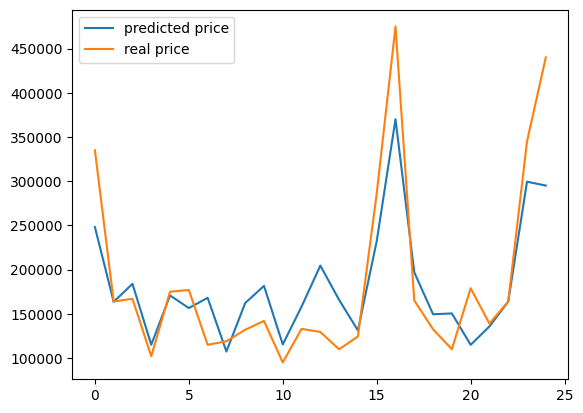

In [110]:
plt.plot(range(25), pred_prices, label='predicted price')
plt.plot(range(25), real_prices, label='real price')
plt.legend()
plt.show()